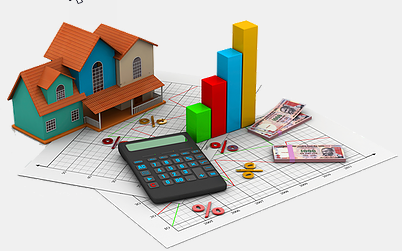

# <div align="center"> Advanced-House-Price-Prediction



## The Capstone Project for IBM Advanced Data Science Specialization Certification by Coursera

----

### *Abstract*
------
In this project, We build a model to predict House-Price. 
For the selection of prediction methods we compare and explore various
prediction methods. We utilize Random Forest as our model
because of its adaptable and probabilistic methodology on model
selection. Our result exhibit that our approach of the issue need
to be successful, and has the ability to process predictions that
would be comparative with other house cost prediction models. 
XGBoost, lasso regression and neural system on look at their
order precision execution. We in that point recommend a housing
cost prediction model to support a house vender or a real estate person. 




### *Objective*
-----
The objective of this project is to build a model to forecast the House-Price. You are provided with 79 explanatory variables describing (almost) every aspect of residential homes.

###### Dataset to downloaded from the below link
[https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


### *Motivation for The Case Study*
------
Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers . Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s data-set proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.



### Part - II : The Neural Network Approach


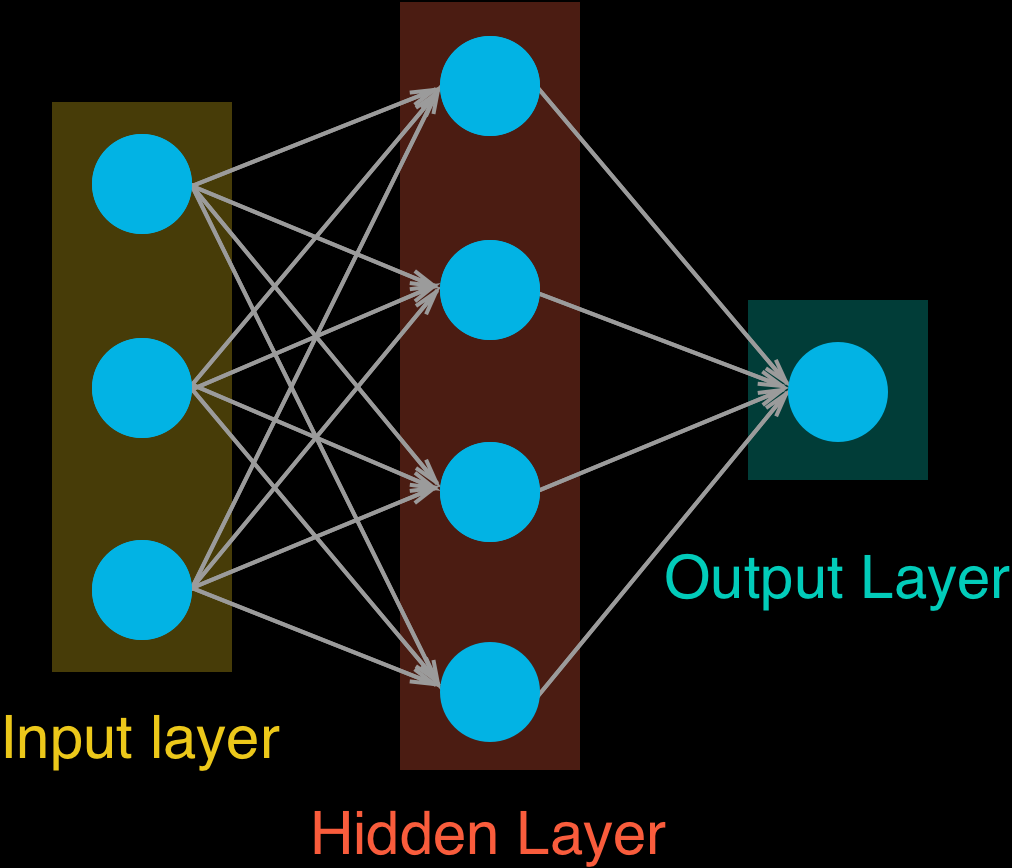

In below steps we will build your network. We'll implement the forward pass through the network. You'll also set the hyperparameters: the number of hidden units, and the number of training passes.

The network has five layers, 4 hidden layer and an output layer. The hidden layer will use the ReLu function for activations. The output layer has only one node and uses Sigmoid activation that's why it's used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called forward propagation.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called backpropagation.

 **Important Part of Back-Propagation Implementation**: We'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

**Below, we divide the neural network design and architecture into subtask to be accomplished:**

1. Implement the ReLu and sigmoid functions to use as the activation function. 
2. Implement the forward pass in the train method.
3. Implement the Adam optimizer algorithm in the train model to calculate the mean square error.
4. plot the graph for both train and test model.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
pd.pandas.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train = pd.read_csv('C:\\Users\\vkaush2\\Desktop\\House estimation kaggle\\train.csv')
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

test = pd.read_csv('C:\\Users\\vkaush2\\Desktop\\House estimation kaggle\\test.csv')
test = test.select_dtypes(exclude=['object'])
test.fillna(0,inplace=True)
test.drop('Id',axis = 1, inplace = True)

print("")
print("List of features contained our dataset:",list(train.columns))


Shape of the train data with all features: (1460, 81)

Shape of the train data with numerical features: (1460, 38)

List of features contained our dataset: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [2]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])


Number of Outliers: 139
Number of rows without outliers: 1321


In [3]:
train.shape

(1321, 37)

In [4]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [5]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('SalePrice')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice).reshape((1321,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.207668,0.062802,0.625,0.428571,0.953488,0.883333,0.12250,0.416274,0.0,0.070721,0.266999,0.200384,0.530106,0.0,0.461538,0.333333,0.0,0.666667,0.5,0.500000,0.0,0.555556,0.000000,0.996517,0.50,0.394245,0.000000,0.167582,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.403057
1,0.000000,0.255591,0.072904,0.500,0.857143,0.744186,0.433333,0.00000,0.576651,0.0,0.133899,0.393637,0.395014,0.000000,0.0,0.298984,0.000000,0.5,0.666667,0.0,0.500000,0.0,0.333333,0.333333,0.983085,0.50,0.330935,0.404891,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.340220
2,0.235294,0.217252,0.087396,0.625,0.428571,0.937984,0.866667,0.10125,0.286557,0.0,0.204620,0.286962,0.231064,0.537554,0.0,0.489115,0.333333,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.333333,0.995522,0.50,0.437410,0.000000,0.115385,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.437966
3,0.294118,0.191693,0.072464,0.625,0.428571,0.271318,0.333333,0.00000,0.127358,0.0,0.254597,0.235808,0.250719,0.469274,0.0,0.464078,0.333333,0.0,0.333333,0.0,0.500000,0.0,0.444444,0.333333,0.994030,0.75,0.461871,0.000000,0.096154,0.824242,0.0,0.0,0.0,0.0,0.090909,0.00,0.243639
4,0.235294,0.268371,0.113835,0.750,0.428571,0.930233,0.833333,0.21875,0.386203,0.0,0.231023,0.357143,0.338926,0.653631,0.0,0.638607,0.333333,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.333333,0.995025,0.75,0.601439,0.260870,0.230769,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.499638


In [6]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "SalePrice"

# Columns
feature_cols = FEATURES

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)

y_train = pd.DataFrame(y_train, columns = [LABEL])
print(y_train.head())
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
print(training_set.head())

# Training for submission
training_sub = training_set[col_train]

      SalePrice
1160   0.268075
1066   0.195930
1194   0.086549
1168   0.296933
1311   0.476365
      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1160    0.000000     0.194888  0.065877        0.375     0.714286   0.751938   
1066    0.000000     0.118211  0.049636        0.375     0.428571   0.806202   
1194    0.000000     0.000000  0.046790        0.125     0.571429   0.534884   
1168    0.235294     0.249201  0.077647        0.625     0.428571   0.744186   
1311    0.235294     0.255591  0.076417        0.750     0.428571   0.891473   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1160      0.966667     0.00000    0.313679    0.097693   0.171617   
1066      0.583333     0.00000    0.387972    0.000000   0.102782   
1194      0.000000     0.00000    0.000000    0.000000   0.000000   
1168      0.433333     0.00000    0.114387    0.000000   0.300802   
1311      0.766667     0.27375    0.636203    0.000000   0.066478   

      To

In [7]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
print(y_test.head())
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
print(testing_set.head())

     SalePrice
727   0.233166
479   0.176730
240   0.198257
422   0.258766
49    0.220366
     MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
727    0.352941     0.239617  0.074221        0.375     0.428571   0.674419   
479    0.000000     0.000000  0.100440        0.250     0.428571   0.713178   
240    0.058824     0.226837  0.049188        0.375     0.571429   0.465116   
422    0.294118     0.252396  0.071850        0.375     0.714286   0.480620   
49     0.352941     0.191693  0.051243        0.375     0.428571   0.581395   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
727      0.283333        0.00    0.235849    0.325645   0.047148     0.305677   
479      0.366667        0.00    0.353774    0.000000   0.124470     0.269495   
240      0.083333        0.00    0.237618    0.084803   0.099953     0.230817   
422      0.750000        0.14    0.227594    0.000000   0.161245     0.227074   
49       0.083333        0.00 

In [8]:
import keras

Using TensorFlow backend.


In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam())

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values
# Predictions
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               7400      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 33,851
Trainable params: 33,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist=model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=10,validation_data=(X_val,Y_val))

Train on 885 samples, validate on 218 samples
Epoch 1/100
885/885 [==============================] - 0s 280us/step - loss: 0.0283 - val_loss: 0.0090
Epoch 2/100
885/885 [==============================] - 0s 136us/step - loss: 0.0046 - val_loss: 0.0046
Epoch 3/100
885/885 [==============================] - 0s 132us/step - loss: 0.0038 - val_loss: 0.0049
Epoch 4/100
885/885 [==============================] - 0s 128us/step - loss: 0.0033 - val_loss: 0.0038
Epoch 5/100
885/885 [==============================] - 0s 122us/step - loss: 0.0030 - val_loss: 0.0035
Epoch 6/100
885/885 [==============================] - 0s 113us/step - loss: 0.0026 - val_loss: 0.0042
Epoch 7/100
885/885 [==============================] - 0s 112us/step - loss: 0.0026 - val_loss: 0.0035
Epoch 8/100
885/885 [==============================] - 0s 108us/step - loss: 0.0023 - val_loss: 0.0032
Epoch 9/100
885/885 [==============================] - 0s 110us/step - loss: 0.0025 - val_loss: 0.0032
Epoch 10/100
885/885 [=====

885/885 [==============================] - 0s 112us/step - loss: 6.7803e-04 - val_loss: 0.0036
Epoch 79/100
885/885 [==============================] - 0s 115us/step - loss: 6.9689e-04 - val_loss: 0.0032
Epoch 80/100
885/885 [==============================] - 0s 110us/step - loss: 8.6327e-04 - val_loss: 0.0035
Epoch 81/100
885/885 [==============================] - 0s 111us/step - loss: 7.3060e-04 - val_loss: 0.0032
Epoch 82/100
885/885 [==============================] - 0s 106us/step - loss: 6.3957e-04 - val_loss: 0.0033
Epoch 83/100
885/885 [==============================] - 0s 112us/step - loss: 6.1886e-04 - val_loss: 0.0032
Epoch 84/100
885/885 [==============================] - 0s 120us/step - loss: 5.3796e-04 - val_loss: 0.0031
Epoch 85/100
885/885 [==============================] - 0s 110us/step - loss: 5.0250e-04 - val_loss: 0.0038
Epoch 86/100
885/885 [==============================] - 0s 118us/step - loss: 6.0358e-04 - val_loss: 0.0034
Epoch 87/100
885/885 [===================

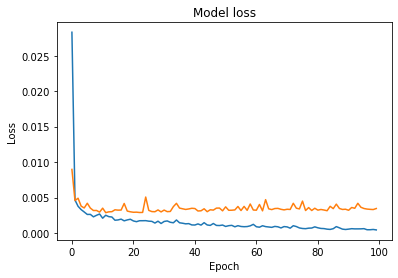

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [21]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(feature_cols), np.array(labels))

885/885 [==============================] - 0s 23us/step


0.00040183037704930215